#### Overview:
This script performs data analysis on the provided datasets, focusing on initial data exploration, sales trends, seasonal trends, price elasticity analysis etc.
It includes functions for descriptive statistics and visualizations to better understand underlying patterns and insights.

Author: Chloe Ang (Ke Er Ang)

In [8]:
import warnings

# Filter out specific warning category
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
pd.set_option('display.max_colwidth', None) 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy import stats

# Data Exploration

The given zip file consists of 5 csv files, which are calendar.csv, sales_train_validation.csv, sample_submission.csv, sell_prices.csv and sales_train_evaluation.csv. Below we will explore all the files except sample_submission.csv to understand what the files contains and the relationship between each files and elements.


In [54]:
sales_train_evaluation = pd.read_csv('sales_train_evaluation.csv')
selling_price = pd.read_csv('sell_prices.csv')
calendar = pd.read_csv('calendar.csv')
sales_train_validation = pd.read_csv('sales_train_validation.csv')

## Explore sales_train_evaluation.csv

Information of sales_train_evaluation.csv:

In [ ]:
sales_train_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


Initial data preview:

In [ ]:
sales_train_evaluation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


Data type distribution:

In [57]:
sales_train_evaluation.dtypes.value_counts()

int64     1941
object       6
Name: count, dtype: int64

#### Summary: 
In this file, we can see that there are 1947 columns and 30490 rows, meaning there are 30490 unique hobbies item and 1941 days of sales record.
There are a mix of integer and object data types, among the columns, id, item_id, dept_id, cat_id, store_id, state_id are object type and all days columns are integer type. The total memory usage for this dataset is over 452.9 MB.

## Explore sales_train_validation.csv

In [4]:
sales_train_validation = pd.read_csv('sales_train_validation.csv')

Information of sales_train_validation.csv:

In [5]:
sales_train_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


Initial data preview:

In [ ]:
sales_train_validation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


Data type distribution:

In [6]:
sales_train_validation.dtypes.value_counts()

int64     1913
object       6
Name: count, dtype: int64

Check NA values:

In [64]:
# Check if there is any NA value in the file
na_counts = sales_train_validation.isna().sum()
na_counts.any()

False

#### Summary:
In this file, we can see it is similar to sales_train_validation.csv with the key difference being an additional 28 columns. As the previous file is used to evaluate the predicted quantity for sales of coming 28 days of this file. There is no NA values in this file and our analysis will focus solely on this dataset, exploring its structure and content to understand sales trends over time.

### Comprehensive columns exploration in sales_train_validation.csv

#### Check dept_id column:

Distribution of dept_id :

In [ ]:
sales_train_validation['dept_id'].value_counts()

FOODS_3        8230
HOUSEHOLD_1    5320
HOUSEHOLD_2    5150
HOBBIES_1      4160
FOODS_2        3980
FOODS_1        2160
HOBBIES_2      1490
Name: dept_id, dtype: int64

Item count by department:

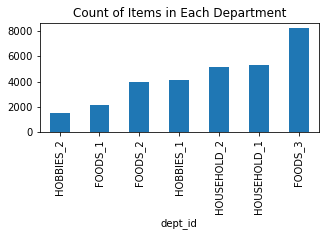

In [ ]:
# Visualise the count of items in each department
sales_train_evaluation.groupby('dept_id').count()['id'].sort_values().plot(kind='bar', figsize=(5, 2), title='Count of Items in Each Department')
plt.show()

In dept_id, FOODS_3 has the highest number of items and HOBBIES_2 has the lowest number of items.

#### Check cat_id column:

Distribution of cat_id column:

In [ ]:

sales_train_validation['cat_id'].value_counts()

FOODS        14370
HOUSEHOLD    10470
HOBBIES       5650
Name: cat_id, dtype: int64

Item count by category:

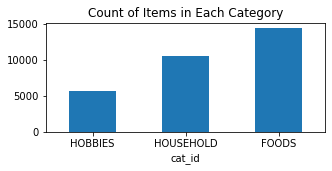

In [ ]:
# Visualise the count of items in each category
sales_train_evaluation.groupby('cat_id').count()['id'].sort_values().plot(kind='bar', figsize=(5, 2), title='Count of Items in Each Category')
plt.xticks(rotation=0)
plt.show()

In term of category, foods has the highest amount of items and hobbies has the lowest amount of items.

#### Check state_id column:

Distribution of state_id:

In [ ]:
sales_train_validation['state_id'].value_counts()

CA    12196
TX     9147
WI     9147
Name: state_id, dtype: int64

Item count by state:

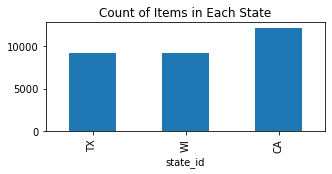

In [ ]:
# Visualise the count of items in each category
sales_train_evaluation.groupby('state_id').count()['id'].sort_values().plot(kind='bar', figsize=(5, 2), title='Count of Items in Each State')
plt.show()

In term of state, CA has the most total items, TX and WI have the same amount of total items.

#### Check store_id column:

Distribution of store_id column :

In [ ]:
# Check store_id
sales_train_validation['store_id'].value_counts()

CA_1    3049
CA_2    3049
CA_3    3049
CA_4    3049
TX_1    3049
TX_2    3049
TX_3    3049
WI_1    3049
WI_2    3049
WI_3    3049
Name: store_id, dtype: int64

Item count by store_id:

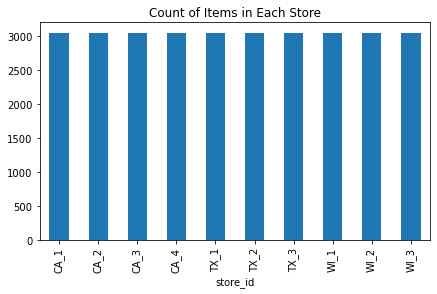

In [ ]:
# Visualise the count of items in each store
sales_train_evaluation.groupby('store_id').count()['id'].sort_values().plot(kind='bar', figsize=(7, 4), title='Count of Items in Each Store')
plt.show()

In term of store, all store has the equal number of items.

Unique stores per state :

In [67]:
# Group by 'store_id' and count unique 'dept_id'
store_per_state = sales_train_validation.groupby('state_id')['store_id'].nunique()
store_per_state

state_id
CA    4
TX    3
WI    3
Name: store_id, dtype: int64

Departments per store :

In [71]:
# Group by 'store_id' and count unique 'dept_id'
dept_per_store = sales_train_validation.groupby('store_id')['dept_id'].agg(set)
print(dept_per_store)

store_id
CA_1    {HOUSEHOLD_1, FOODS_3, HOUSEHOLD_2, HOBBIES_1, FOODS_2, HOBBIES_2, FOODS_1}
CA_2    {HOUSEHOLD_1, FOODS_3, HOUSEHOLD_2, HOBBIES_1, FOODS_2, HOBBIES_2, FOODS_1}
CA_3    {HOUSEHOLD_1, FOODS_3, HOUSEHOLD_2, HOBBIES_1, FOODS_2, HOBBIES_2, FOODS_1}
CA_4    {HOUSEHOLD_1, FOODS_3, HOUSEHOLD_2, HOBBIES_1, FOODS_2, HOBBIES_2, FOODS_1}
TX_1    {HOUSEHOLD_1, FOODS_3, HOUSEHOLD_2, HOBBIES_1, FOODS_2, HOBBIES_2, FOODS_1}
TX_2    {HOUSEHOLD_1, FOODS_3, HOUSEHOLD_2, HOBBIES_1, FOODS_2, HOBBIES_2, FOODS_1}
TX_3    {HOUSEHOLD_1, FOODS_3, HOUSEHOLD_2, HOBBIES_1, FOODS_2, HOBBIES_2, FOODS_1}
WI_1    {HOUSEHOLD_1, FOODS_3, HOUSEHOLD_2, HOBBIES_1, FOODS_2, HOBBIES_2, FOODS_1}
WI_2    {HOUSEHOLD_1, FOODS_3, HOUSEHOLD_2, HOBBIES_1, FOODS_2, HOBBIES_2, FOODS_1}
WI_3    {HOUSEHOLD_1, FOODS_3, HOUSEHOLD_2, HOBBIES_1, FOODS_2, HOBBIES_2, FOODS_1}
Name: dept_id, dtype: object


#### Summary:
This dataset reveals that there are 3 unique states: California, Wisconsin, and Texas. In California, there are 4 stores, while the other 2 states have 3 stores each. Each store contains 7 departments, consisting of 2 household departments, 3 food departments, and 2 hobby departments.

## Explore sell_prices.csv

In [ ]:
selling_price = pd.read_csv('sell_prices.csv')

Initial data preview:

In [ ]:
selling_price.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


Information of sell_prices.csv:

In [ ]:
selling_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


Check NA values:

In [73]:
# Check if there is any NA value in the file
na_counts = selling_price.isna().sum()
na_counts.any()

False

#### Summary:
This dataset consists of 4 columns and 6,841,121 rows: store_id, item_id, wm_yr_wk, and sell_price. It contains the weekly sell price of each item over a 5-year period. Additionally, there are no NA values in the dataset, ensuring complete data for each record

### Comprehensive columns exploration in sell_prices.csv

Unique store IDs:

In [ ]:
# Check store_id in sell_prices.csv
selling_price['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

This dataset contains 7 unique stores, which align with the stores listed in the "Sales_train_validation.csv" file, ensuring consistency across datasets.There are 7 stores in this file.

Items with minimum sell price:

In [ ]:
# Find min price of of all items
min_item =selling_price[selling_price['sell_price'] == (selling_price['sell_price'].min())]
min_item

,store_id,item_id,wm_yr_wk,sell_price
225727,CA_1,HOUSEHOLD_1_443,11442,0.01
1394085,CA_3,HOBBIES_1_261,11332,0.01
1394086,CA_3,HOBBIES_1_261,11333,0.01
1394087,CA_3,HOBBIES_1_261,11334,0.01
2617306,CA_4,FOODS_3_413,11148,0.01
4877375,WI_1,HOBBIES_1_338,11342,0.01
4877376,WI_1,HOBBIES_1_338,11343,0.01
5044267,WI_1,HOUSEHOLD_1_533,11408,0.01
5316537,WI_1,FOODS_3_122,11425,0.01
6282347,WI_3,HOUSEHOLD_1_036,11442,0.01


Items with maximum sell price:

In [ ]:
# Find max price of all item
max_item =selling_price[selling_price['sell_price'] == (selling_price['sell_price'].max())]
max_item

,store_id,item_id,wm_yr_wk,sell_price
6485945,WI_3,HOUSEHOLD_2_406,11317,107.32
6485946,WI_3,HOUSEHOLD_2_406,11318,107.32
6485947,WI_3,HOUSEHOLD_2_406,11319,107.32


I extract records with the minimum and maximum sell prices from the dataset, identifying which items are sold at the lowest and highest prices. This provides insights into the pricing strategies for the cheapest items.
The dataset reveals that the minimum price of all items is 0.01, with 7 unique items sold at this price. The maximum price is 107.32, which applies to only 1 item. This analysis highlights the range of prices across different items in the dataset.

In [75]:
# To categorise the items in selling_price 
def categorize_item(item_id):
    if 'HOBBIES' in item_id:
        return 'HOBBIES'
    elif 'FOOD' in item_id:
        return 'FOODS'
    elif 'HOUSEHOLD' in item_id:
        return 'HOUSEHOLDS'
    else:
        return 'OTHER'

In [76]:
selling_price['cat_id'] = selling_price['item_id'].apply(categorize_item)

Item prices analysis by category:

In [77]:
# To find mean & std of selling price in each category.
selling_price_summary = selling_price.groupby("cat_id").agg(mean = ("sell_price","mean"),median = ("sell_price","median"),std = ("sell_price","std"), 
                                                            min = ("sell_price", "min"), max =("sell_price","max"))
print(selling_price_summary)

                mean  median       std   min     max
cat_id                                              
FOODS       3.251027    2.68  2.132220  0.01   19.48
HOBBIES     5.333896    3.97  4.828999  0.01   30.98
HOUSEHOLDS  5.465780    4.94  3.375843  0.01  107.32


- Findings:

    - Foods: The mean is higher than the median, suggesting a right-skewed distribution, likely due to some higher-priced items pulling the average up. The standard deviation indicates a moderate spread of prices around the mean.

    - Hobbies: This category shows a significant difference between the mean and median, indicating a right-skewed distribution. The high standard deviation suggests that prices vary widely, with some items being significantly more expensive than others.
    
    - Households: The closer values of mean and median suggest a more symmetric distribution compared to other categories. However, the standard deviation indicates a considerable spread of prices around the average.

Box Plot of selling prices by category:

We create a box plot to visualize the distribution of selling prices across different categories. The plot displays the spread, quartiles, and potential outliers for each category, providing insights into pricing patterns and variations.

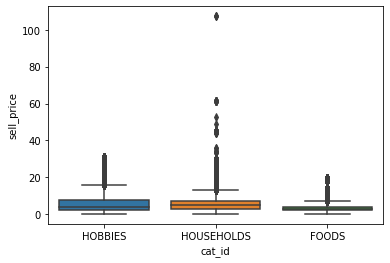

In [ ]:
sns.boxplot(data=selling_price, x="cat_id", y="sell_price")
plt.show()

Box Plot Analysis by Category:

- Hobbies:
    - The median is closer to the bottom of the box, indicating a skew toward lower prices.
    - The whiskers extend upward significantly, suggesting a wide range of prices, with several outliers on the higher end.

- Households:
    - The median price is higher than in the Hobbies category, indicating a different price distribution.
    - The whiskers extend upward significantly, suggesting a wide range of prices.
    - Outliers are present, indicating that some household items are priced significantly higher than the majority.

- Foods:
    - The smaller IQR box shows that the prices of food items are more tightly clustered.
    - The short whiskers and few outliers suggest less variation in the prices of food items.

Price Range Analysis by Store and Item:

The item and store with the maximum change, minimum change are found, along with their values.

In [81]:
# To find the range of price changes of each items.
price_range = selling_price.groupby(['store_id','item_id'])['sell_price'].apply(lambda x: max(x) - min(x))
max_change_product = price_range.idxmax()
max_change_value = price_range.max()
min_change_product = price_range.idxmin()
min_change_value = price_range.min()
print("Max change :", max_change_product,":",max_change_value, "\nMin change",min_change_product,":", min_change_value)

Max change : ('WI_3', 'HOUSEHOLD_2_406') : 104.05999999999999 
Min change ('CA_1', 'FOODS_1_014') : 0.0


- Findings:

    - Max change: The item "HOUSEHOLD_2_406" from store "WI_3" has a maximum price change of 104.06, indicating a difference of 104 dollars between its highest and lowest selling prices.
    
    - Min change: The item "FOODS_1_014" from store "CA_1" has a minimum price change of 0.0, meaning its selling price has not changed over the 5-year period.


Price trend for item "HOUSEHOLD_2_406":

I plot the selling price of the item "HOUSEHOLD_2_406" from store "WI_3" over time, using its weekly records. The x-axis represents the week, and the y-axis represents the sell price, showing how the price has changed over the 5-year period.

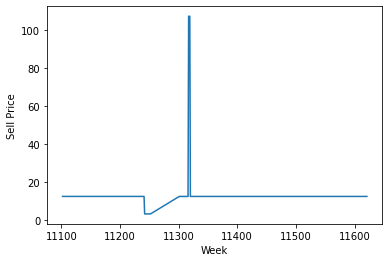

In [ ]:
# Further investigate the trend of sell price of HOUSEHOLD_2_406 from WI_3
max_change_item = selling_price[(selling_price['item_id'] == 'HOUSEHOLD_2_406') & (selling_price['store_id'] == 'WI_3')]
x = max_change_item['wm_yr_wk']
y = max_change_item['sell_price']
plt.plot(x, y)
plt.xlabel("Week")  
plt.ylabel("Sell Price")  
plt.show()

The selling price of the item remains constant most of the time, but there is a spike around week 11320. This spike lasts for 3 weeks, as indicated by previous analysis. Potential factors for this temporary increase include human error in data entry, seasonal demand, or a temporary shortage. The price then drops back to its normal level, reinforcing that the spike was temporary.

### Visualisation of prices distribution 

I create a density plot to visualize the distribution of prices across different categories, departments, and stores. This provides insights into how prices vary within and between these groupings, highlighting trends and potential pricing strategies

In [82]:
selling_price_2 = pd.read_csv('sell_prices.csv')
selling_price_2['cat_id'] = selling_price_2['item_id'].apply(categorize_item)
# apply log1p to make the selling price less skewed
selling_price_2['sell_price']=selling_price_2['sell_price'].apply(np.log1p)

In [83]:
# Separate all items into different data frame according to different categories 
Hobbies_df = selling_price_2[selling_price_2['cat_id'] == 'HOBBIES']
Foods_df = selling_price_2[selling_price_2['cat_id'] == 'FOODS']
Household_df = selling_price_2[selling_price_2['cat_id'] == 'HOUSEHOLDS']

Density plot of prices by store for different categories:

In [92]:
# Create dept_id and state_id for each data frame
Hobbies_df.loc[:, 'dept_id'] = Hobbies_df['item_id'].str[-5]
Hobbies_df.loc[:, 'state_id'] = Hobbies_df['store_id'].str[0:2]

Household_df.loc[:, 'dept_id'] = Household_df['item_id'].str[-5]
Household_df.loc[:, 'state_id'] = Household_df['store_id'].str[0:2]

Foods_df.loc[:, 'dept_id'] = Foods_df['item_id'].str[-5]
Foods_df.loc[:, 'state_id'] = Foods_df['store_id'].str[0:2]

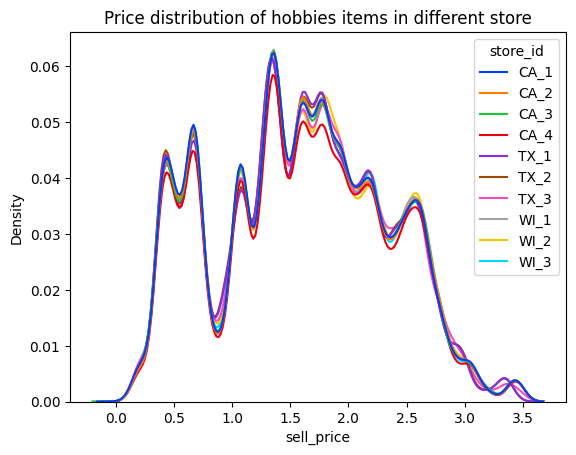

In [85]:
sns.kdeplot(data=Hobbies_df, x='sell_price', hue='store_id', palette='bright')
plt.xlabel('sell_price')
plt.ylabel('Density')
plt.title('Price distribution of hobbies items in different store')
plt.show()

- Observations:
    - The hobbies items in all stores seem to have a common price range as indicated by the peaks and troughs that align across the different lines.
    - There are multiple peaks in the line graph, meaning there are a few popular prices for hobbies items.
    - The long and thin right tails of the line graphs indicates there are not much high priced hobbies items.
    - While the overall patterns are quite similar, there are slight variations between stores in terms of the density distribution.

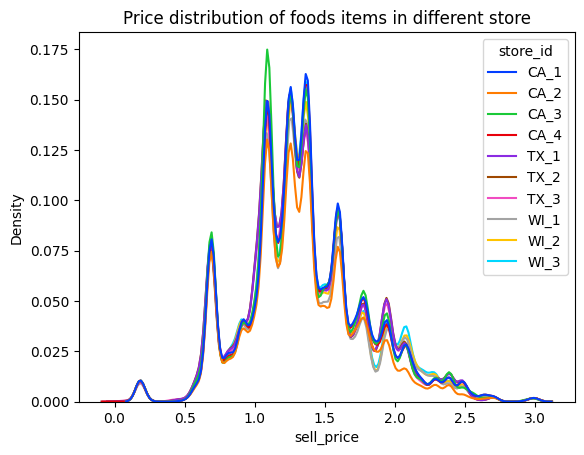

In [86]:
sns.kdeplot(data=Foods_df, x='sell_price', hue='store_id', palette='bright')
plt.xlabel('sell_price')
plt.ylabel('Density')
plt.title('Price distribution of foods items in different store')
plt.show()

- Observations: 
    - The food items also show common pricing patterns across different stores.
    - As different stores have different number of items for sales, it is normal to see some stores have differences in density compared to other stores.
    - There are multiple peaks in the graph, meaning there are several popular prices for the foods items. 
    - The sharp peaks also indicates that particular price points are more common for the food items, as a lot of items are priced at that prices showed by the density.
    

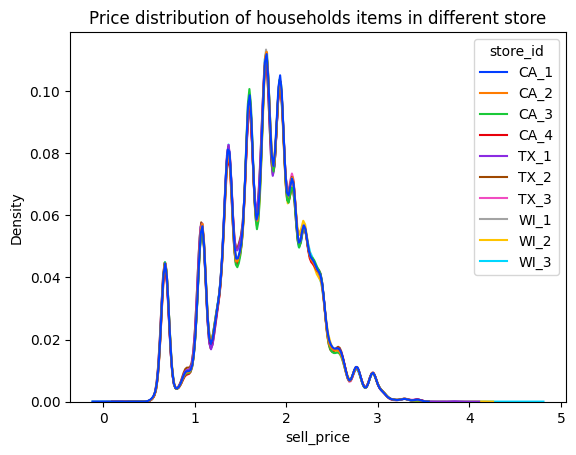

In [87]:
sns.kdeplot(data=Household_df, x='sell_price', hue='store_id', palette='bright')
plt.xlabel('sell_price')
plt.ylabel('Density')
plt.title('Price distribution of households items in different store')
plt.show()

- Observations: 
    - Same as foods and hobbies items, the households items also show common pricing patterns across different stores.
    - There are multiple peaks in the graph, meaning there are several popular prices for the hobbies items. 
    - The long right tails indicates some items are relatively more expensive than the other items.

Density plot by department:

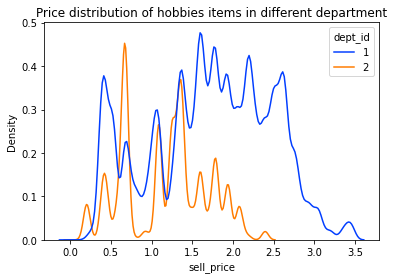

In [ ]:
sns.kdeplot(data=Hobbies_df, x='sell_price', hue='dept_id', palette='bright')
plt.xlabel('sell_price')
plt.ylabel('Density')
plt.title('Price distribution of hobbies items in different department')
plt.show()

- Observation:
    - The graph shows a significant variation in the density distribution between the two departments, which suggests a variation in the range and concentration of item prices within each department.
    - In general, department 2 has items with a broader price range and extends to higher prices more than department 1, whose items predominantly cluster at lower price points.

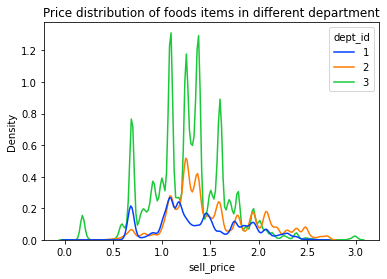

In [ ]:
sns.kdeplot(data=Foods_df, x='sell_price', hue='dept_id', palette='bright')
plt.xlabel('sell_price')
plt.ylabel('Density')
plt.title('Price distribution of foods items in different department')
plt.show()

- Observation:
    - Each department seems to have distinct peaks, which represent the most common price points for items within that department are different.
    - Department 3 exhibits the most peaks and the highest density, department 1 (Orange Line) shows lowest density and the least peaks.

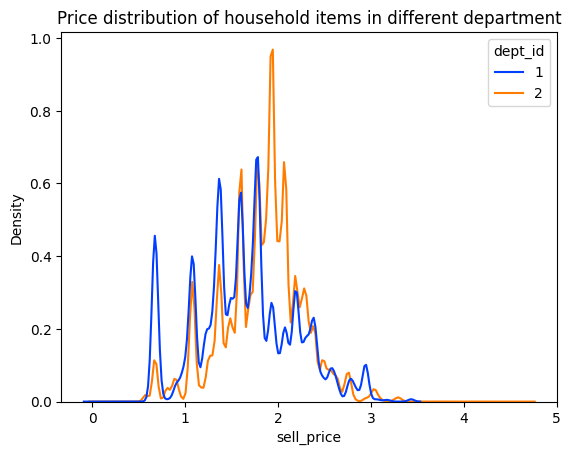

In [93]:
sns.kdeplot(data = Household_df, x='sell_price', hue='dept_id', palette='bright')
plt.xlabel('sell_price')
plt.ylabel('Density')
plt.title('Price distribution of household items in different department')
plt.show()

- Observation:
    - Items in department 2 exhibits higher price than department 1.
    - In department 1, more items priced lower price showed by the multiple peaks concentrated between 0 to 2.
    - In department 2, most items priced around 2 dollars showed by the outstanding peak.
    - The long right tails indicates some items priced higher than the other items.

## Explore calendar.csv

In [ ]:
calendar = pd.read_csv('calendar.csv')

Initial data preview:

In [ ]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


Information of calendar.csv:

In [ ]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


- This dataset contains 14 columns and 1969 rows. 
- Columns such as date, weekday, d, event_name, and event_type are of object type, while the remaining columns are of type int64.
- There are some NA values in the dataset, particularly in columns related to events. Specifically, event_name_1, event_type_1 only have 162 non-null values , while event_name_2, and event_type_2 have only 5 non-null values.

Date range and year information:

In [97]:
calendar['date'] = pd.to_datetime(calendar['date'])
print(calendar['date'].min())
print(calendar['date'].max())
print(calendar['year'].unique())

2011-01-29 00:00:00
2016-06-19 00:00:00
[2011 2012 2013 2014 2015 2016]


There are five years of data included in the DataFrame, spanning from January 29, 2011, to June 19, 2016.

Event details:

- Unique Event Days: The unique events listed in the event_name_1 column.
- Number of Unique Event Days: The count of unique events in this column, highlighting the diversity of events.
- Unique Event Types: The different types of events listed in the event_type_1 column

In [102]:
print("Unique event days  : ", calendar['event_name_1'].unique())
print("Number of unique event days : ", calendar['event_name_1'].nunique())
print("Unique event type : ",calendar['event_type_1'].unique())

Unique event days  :  [nan 'SuperBowl' 'ValentinesDay' 'PresidentsDay' 'LentStart' 'LentWeek2'
 'StPatricksDay' 'Purim End' 'OrthodoxEaster' 'Pesach End' 'Cinco De Mayo'
 "Mother's day" 'MemorialDay' 'NBAFinalsStart' 'NBAFinalsEnd'
 "Father's day" 'IndependenceDay' 'Ramadan starts' 'Eid al-Fitr'
 'LaborDay' 'ColumbusDay' 'Halloween' 'EidAlAdha' 'VeteransDay'
 'Thanksgiving' 'Christmas' 'Chanukah End' 'NewYear' 'OrthodoxChristmas'
 'MartinLutherKingDay' 'Easter']
Number of unique event days :  30
Unique event type :  [nan 'Sporting' 'Cultural' 'National' 'Religious']


Distribution of event_type_1:

In [ ]:
event_type_count = calendar.groupby(['event_type_1']).size()
event_type_count

event_type_1
Cultural     37
National     52
Religious    55
Sporting     18
dtype: int64

- There are 30 unique event days and 4 event types in the "event_type_1" category.
- The event types include Cultural, National, Religious, and Sporting.
- Sporting has the lowest number of event days.
- Religious has the highest number of event days.

Event count by type and name:

In [ ]:
events_count = calendar.groupby(['event_type_1','event_name_1']).size()
events_count

event_type_1  event_name_1       
Cultural      Cinco De Mayo          5
              Easter                 5
              Father's day           4
              Halloween              5
              Mother's day           6
              StPatricksDay          6
              ValentinesDay          6
National      Christmas              5
              ColumbusDay            5
              IndependenceDay        5
              LaborDay               5
              MartinLutherKingDay    5
              MemorialDay            6
              NewYear                5
              PresidentsDay          6
              Thanksgiving           5
              VeteransDay            5
Religious     Chanukah End           5
              Eid al-Fitr            5
              EidAlAdha              5
              LentStart              6
              LentWeek2              6
              OrthodoxChristmas      5
              OrthodoxEaster         5
              Pesach End      

- Most events occur 5 or 6 times over the 5-year period, indicating a relatively consistent frequency.
- The exception is Father's Day, which occurs 4 times during this timeframe.

In [ ]:
event_type2_count = calendar.groupby(['event_type_2','event_name_2']).size()

event_type_2  event_name_2  
Cultural      Cinco De Mayo     1
              Easter            1
              Father's day      2
Religious     OrthodoxEaster    1
dtype: int64

- Category 2 of events comprises only 2 event types and 4 different event days.

##### SNAP - The Supplemental Nutrition Assistance Programme 
- To help low-income people and families buy food
- Gov offers electronic benefit transfer (EBT) cards to qualified households
- These cards can be used at approved retailers to purchase a range of food items, with the exception of hot prepared foods, alcohol, tobacco, and vitamins and supplements. 
- Each state runs its own SNAP programme in accordance with federal rules, and eligibility is established by taking into account criteria including household income, expenses, and size

SNAP days count in California:

In [ ]:
snap_CA = sum(calendar['snap_CA'])
snap_CA

650

SNAP days count in Texas:

In [ ]:
snap_TX = sum(calendar['snap_TX'])
snap_TX

650

SNAP days count in Wisconsin:

In [ ]:
snap_WI= sum(calendar['snap_WI'])
snap_WI

650

Analysis reveals that all states (CA,TX,WI) have the same number of SNAP days over the 5-year period, indicating consistency in the distribution of SNAP benefits across states.

## Exploring Sales Distribution & Relationships with Event and SNAP Days

This section combines different datasets to explore the distribution of sales and uses Ordinary Least Squares (OLS) regression to investigate their relationship with event days and SNAP days.

### Hobbies

Sales distribution of hobbies items:

In [ ]:
hobbies = pd.read_csv('hobbies_df.csv')

/var/folders/7h/s4cspbv95x98l3h5nvklx3ym0000gn/T/ipykernel_1507/1696884522.py:1: DtypeWarning: Columns (15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  hobbies = pd.read_csv('hobbies_df.csv')


In [106]:
hobbies['date'] = pd.to_datetime(hobbies['date'])
daily_sales_hb= hobbies.groupby('date')['sold'].sum()

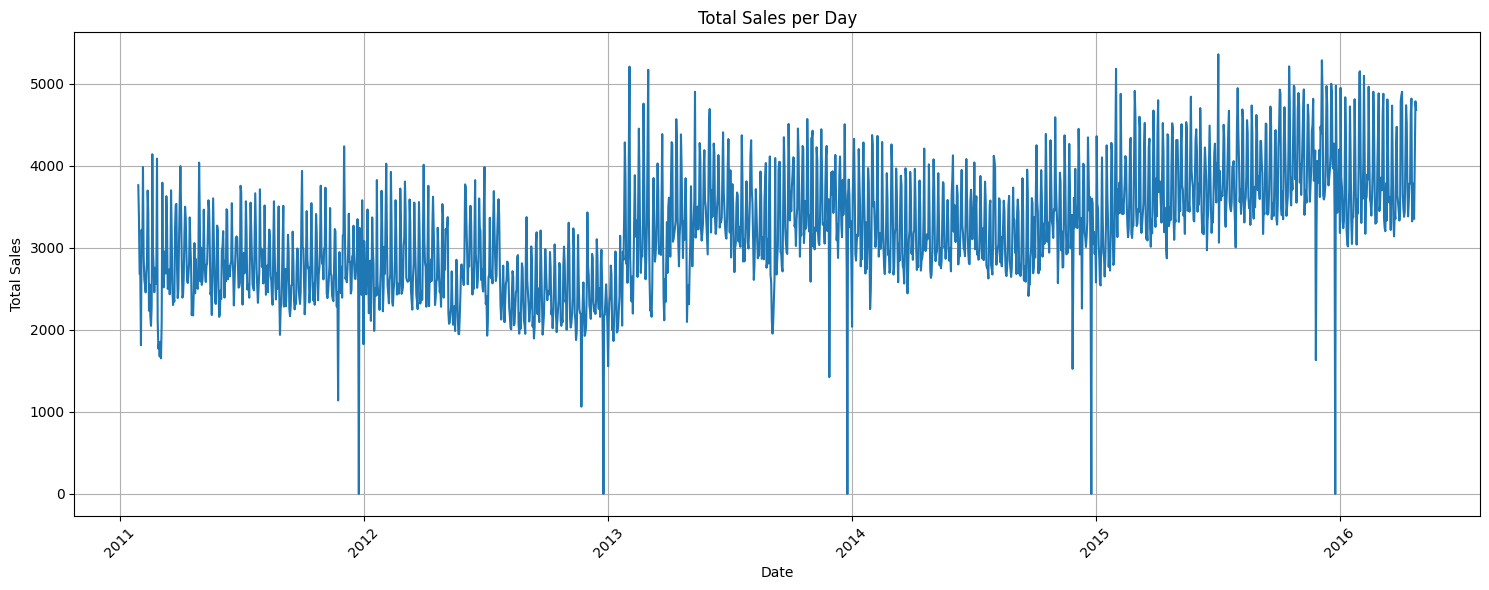

In [108]:
plt.figure(figsize=(15, 6))
plt.plot(daily_sales_hb.index, daily_sales_hb.values)
plt.title('Total Sales per Day')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- Observations :
    - The plot exhibits some periodic patterns, suggesting seasonality in the data. 
    - There are some sharp dips during end of the year which indicate lower to 0 sales correspond to holiday seasons or special event periods, such as X'mas.
    - There is no clear upward or downward trend in the graph, however there is noticeable volatility in daily sales, with some days experiencing significantly higher sales than others.
    - Sales figures fluctuate within a stable range suggesting a steady demand for hobby-related products on most days.


Sales distribution of hobbies items by state and store:

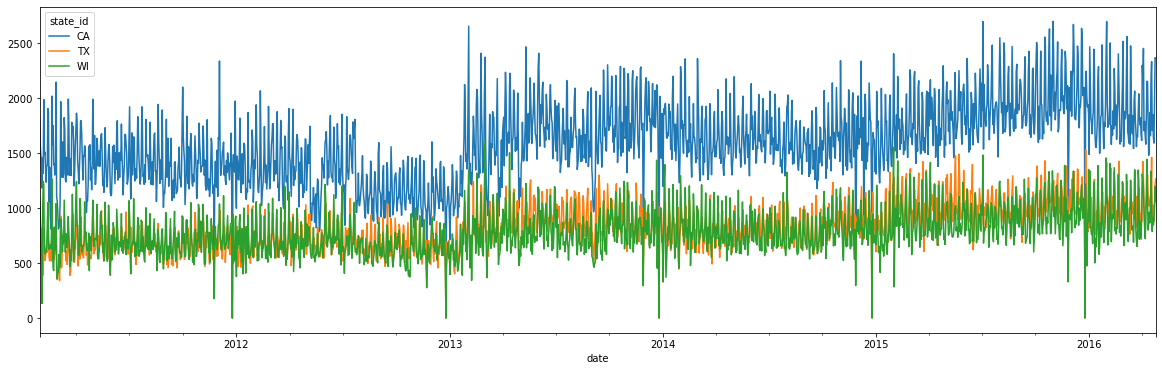

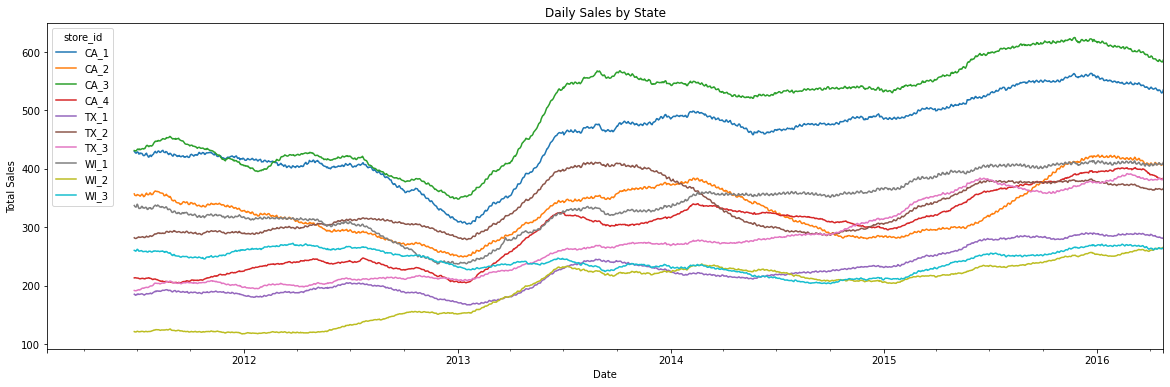

In [ ]:
daily_state_sales_hb= hobbies.groupby(['date','state_id'])['sold'].sum().unstack()
daily_state_sales_hb.plot(kind='line', figsize=(20, 6))

daily_state_sales_hb= hobbies.groupby(['date','store_id'])['sold'].sum().unstack()
window_size = 150 
daily_state_sales_hb_smoothed = daily_state_sales_hb.rolling(window=window_size).mean()
daily_state_sales_hb_smoothed.plot(kind='line', figsize=(20, 6))

plt.title('Daily Sales by State')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

- Observations:
    - California consistently contributes the most to total hobby item sales, indicating a larger and more engaged market compared to Texas and Wisconsin.
    - Over the 5-year period, CA_3 significantly outperforms other stores, followed by CA_1, while WI_2 has the lowest sales among all stores, approximately one-fourth of CA_3's sales.
    - The variability among stores within the same state suggests that location-specific factors significantly influence sales performance.
    - These insights can inform targeted strategies for inventory management, staffing, and marketing to optimize sales across different locations.


#### OLS Analysis: Exploring Relationships Between Sales, Event Days, and SNAP Days

Using linear regression, I conducted separate analyses to explore the relationships between sales of hobbies items and event days, as well as sales and SNAP days. These analyses aim to uncover any potential correlations between sales and the occurrence of event types or the presence of SNAP benefits.

In [109]:
hobbies_try_1 = hobbies[['date','event_type_1','sold','sell_price']]
hobbies_try_1 =hobbies_try_1.copy()

In [117]:
# For each event type in the list, it creates a new column in the DataFrame with a binary indicator (0 or 1), where 1 indicates the presence of that particular event type on a given day.
event_types = ['Sporting', 'Cultural', 'National', 'Religious']
for event_type in event_types:
    hobbies_try_1[event_type] = (hobbies_try_1['event_type_1'] == event_type).astype(int)
# Set date column as index, drop rows where sell price is NA
hobbies_try_1 = hobbies_try_1.set_index(hobbies_try_1.columns[0])
hobbies_try_1 = hobbies_try_1.dropna(subset=['sell_price'])

Relationship between sales and event types:

In [118]:
# Add a constant for the intercept
hobbies_try_1  = sm.add_constant(hobbies_try_1)
# Fit the model
model = sm.OLS(hobbies_try_1['sold'],hobbies_try_1[['const', 'sell_price', 'Cultural','Sporting','National','Religious']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   sold   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                 1.933e+04
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:16:01   Log-Likelihood:            -1.9245e+07
No. Observations:             8642685   AIC:                         3.849e+07
Df Residuals:                 8642679   BIC:                         3.849e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9742      0.001    840.128      0.0

 - Observation:   
    - Impact of Events: The regression model indicates that all events have a negative impact on sales of hobbies items, as evidenced by the negative coefficients. The National event has a more significant and pronounced effect on sales, indicated by its larger coefficient value.
    - Sell Price Coefficient: The coefficient for sell price is -0.0489, suggesting that for every unit increase in price, the number of items sold decreases by 0.0489.
    - Statistical Significance: 
      - The p-values for sell price and National event are small, indicating they are statistically significant predictors. 
      - However, the p-values for Cultural, Sporting, and Religious events are high, suggesting they are not statistically significant.
    - R-squared Value: The low value of R-squared (0.011) indicates that the variation in the target variable is not well explained by this multiple linear regression model. In simpler terms, the model can only account for approximately 1.1% of the target variable's variation.

Relationship between sales and SNAP days:

In [120]:
hobbies_try_2 = hobbies[['date','snap_CA','snap_TX','snap_WI','sold']]
hobbies_try_2 = hobbies_try_2.set_index(hobbies_try_2.columns[0])
X = hobbies_try_2[['snap_CA','snap_TX','snap_WI']]
X = sm.add_constant(X)
model = sm.OLS(hobbies_try_2['sold'],X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   sold   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     50.40
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           1.46e-32
Time:                        14:25:56   Log-Likelihood:            -2.3025e+07
No. Observations:            10808450   AIC:                         4.605e+07
Df Residuals:                10808446   BIC:                         4.605e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5603      0.001    678.684      0.0

- Observation:
    - R-squared value: The regression model suggests that SNAP days have a minimal impact on hobby item sales, as indicated by the low R-squared value (0.000).
    - F statistic: Despite the low R-squared value, the F-statistic (50.40) is significant, with a very low probability (1.46e-32), indicating the overall model's statistical significance.
    - Statistical significance  :
        - In California, SNAP days show a small positive association with sales (coefficient: 0.0108), statistically significant with a low p-value (< 0.001).
        - Similarly, Texas exhibits a slight increase in sales associated with SNAP days (coefficient: 0.0080), also statistically significant (p-value < 0.001).
        - However, SNAP days in Wisconsin do not show a significant association with sales (coefficient: 0.0006, p-value: 0.704).


### Foods

In [9]:
foods = pd.read_csv('foods_df.csv')

Sales distribution of foods items:

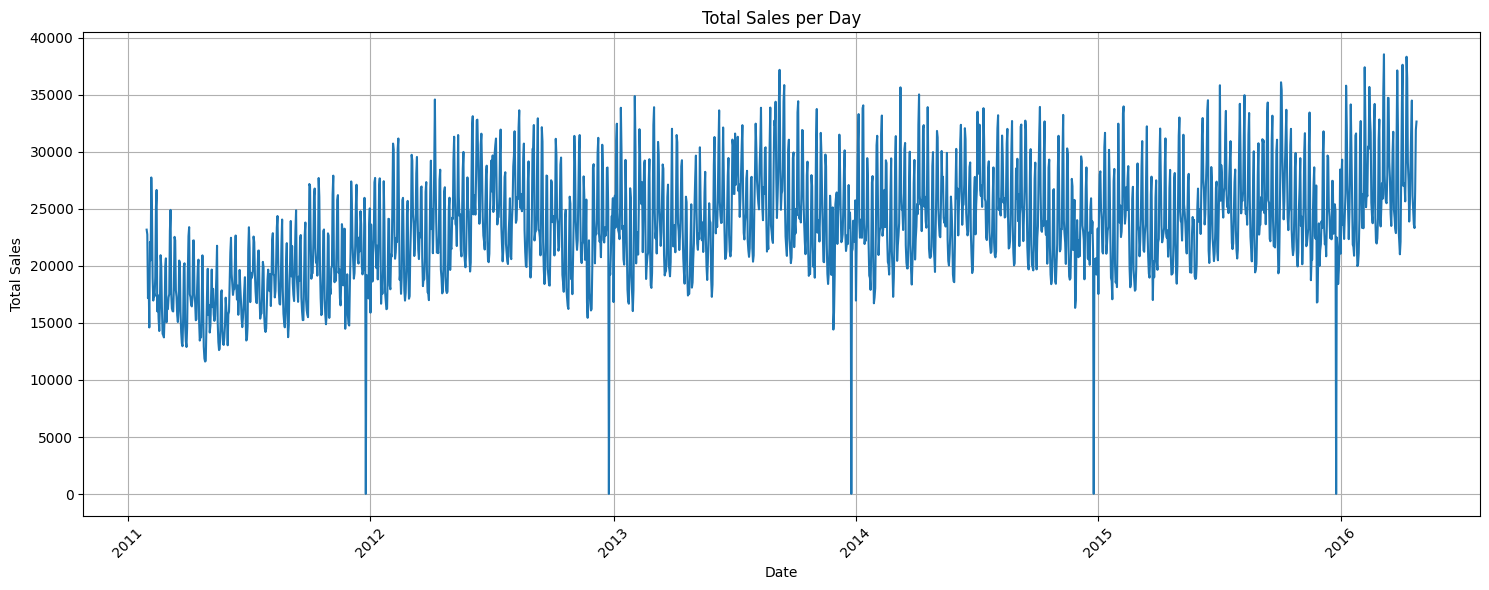

In [126]:
foods['date'] = pd.to_datetime(foods['date'])
daily_sales_food = foods.groupby('date')['sold'].sum()
plt.figure(figsize=(15, 6))
plt.plot(daily_sales_food.index, daily_sales_food.values)
plt.title('Total Sales per Day')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- Observations :
    - The plot exhibits some periodic patterns, suggesting seasonality in the data. 
    - Same as hobbies, there are some sharp dips during end of the year which indicate lower to 0 sales correspond to holiday seasons or special event periods, such as X'mas.
    - There is no clear upward or downward trend in the graph, however there is noticeable volatility in daily sales, with some days experiencing significantly higher sales than others.
    - Sales figures fluctuate within a stable range suggesting a steady demand for food-related products on most days.

Sales distribution of foods items by state and store:

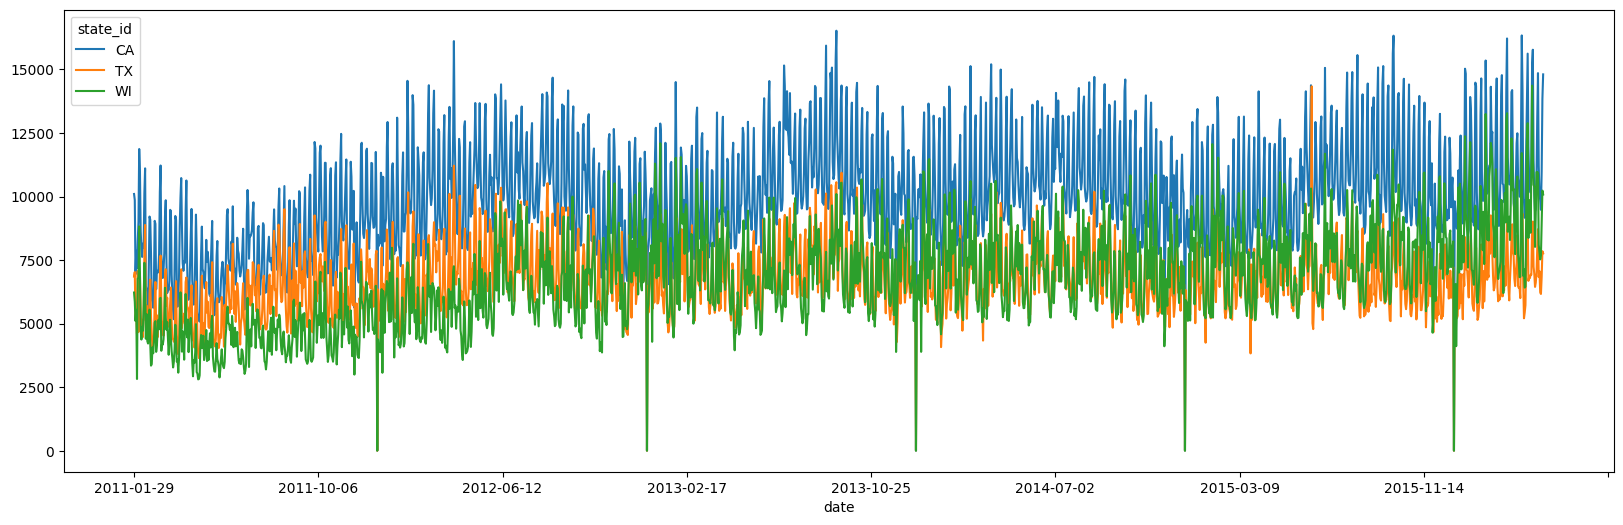

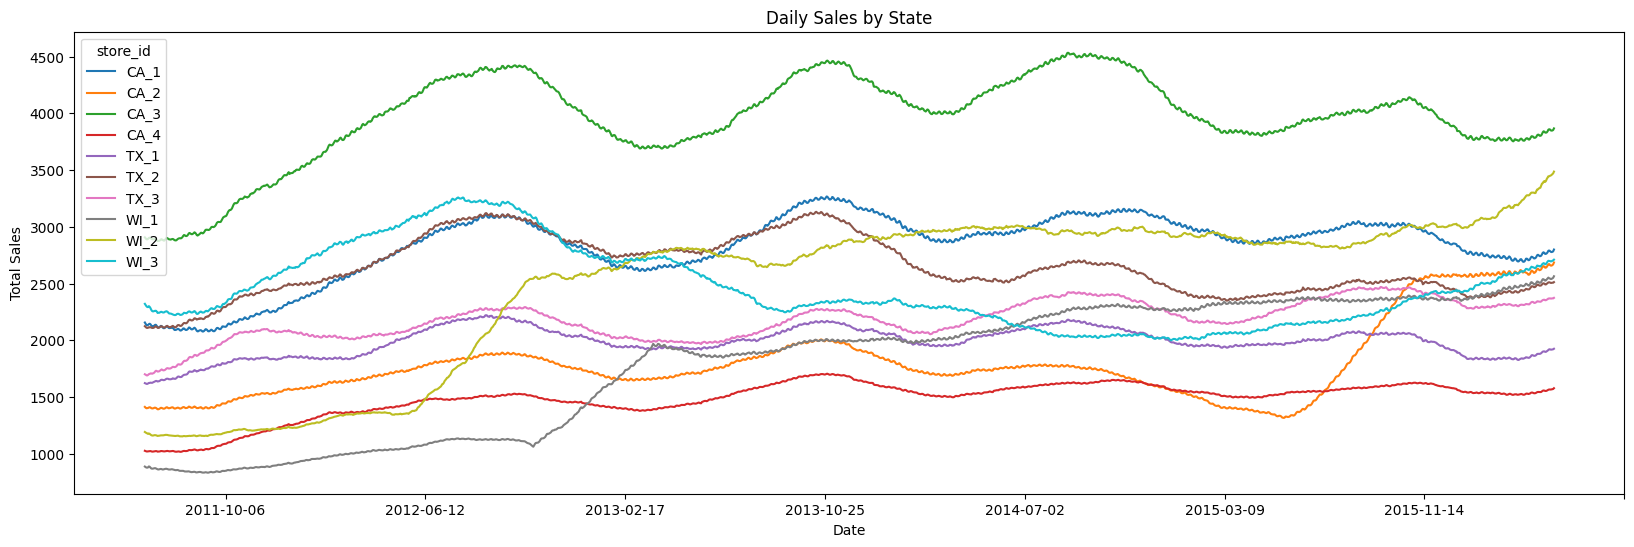

In [13]:
daily_state_sales_foods = foods.groupby(['date','state_id'])['sold'].sum().unstack()
daily_state_sales_foods.plot(kind='line', figsize=(20, 6))

daily_state_sales_foods= foods.groupby(['date','store_id'])['sold'].sum().unstack()
window_size = 150
daily_state_sales_foods_smoothed = daily_state_sales_foods.rolling(window=window_size).mean()
daily_state_sales_foods_smoothed.plot(kind='line', figsize=(20, 6))

plt.title('Daily Sales by State')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

- Observations:
    - California has more sales than Texas and Wisconsin for foods.
    - CA_3 significantly outperformed all the other stores. 
    - WI_3 demonstrated the lowest sales among the stores initially . However, around end of 2012 to 2013, there was a noticeable inflection point where sales began to increase sharply and managed to catch up the other stores after that.
    - WI_2 and CA_2 also showed a sharp increase around mid of 2012 and mid of 2015 respectively.
    - CA_4 generally had the lowest sales among all stores.

Relationship between sales and event types:

In [ ]:
# For each event type in the list, it creates a new column in the DataFrame with a binary indicator (0 or 1), where 1 indicates the presence of that particular event type on a given day.
event_types = ['Sporting', 'Cultural', 'National', 'Religious']
foods_try_1 = foods[['date','event_type_1','sold','sell_price']]
foods_try_1 = foods_try_1.copy()
for event_type in event_types:
    foods_try_1[event_type] = (foods_try_1['event_type_1'] == event_type).astype(int)
foods_try_1 = foods_try_1.set_index(foods_try_1.columns[0])
foods_try_1 = foods_try_1.dropna(subset=['sell_price'])

In [ ]:
X = foods_try_1[['sell_price','Sporting','Cultural','National','Religious']]
X = sm.add_constant(X)
# Fit linear regression model
model = sm.OLS(foods_try_1['sold'],X).fit()
# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   sold   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                 8.983e+04
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:59:53   Log-Likelihood:            -6.7572e+07
No. Observations:            21395953   AIC:                         1.351e+08
Df Residuals:                21395947   BIC:                         1.351e+08
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3685      0.002   1481.652      0.0

- Observation:
    - Impact of Events: 
        - The positive coef values in sporting and cultural indicate that there is a positive relationship between these attributes to number of sales, which can be explained by people consumed more food when celebrating for cultural events or during sport events.
        -  The negative coef values in national and religious indicate that there is a negative relationship between these attributes to number of sales. 
    - Sell Price Coefficient: The coef of sell_price is -0.3866 meaning for every unit increases in price, the number of sales for foods drop by 0.3866.
    - Statistical Significance: 
        - The small p-values for sporting, cultural and national say thats the result is statistically significant.
        - The p-value for religious is 0.061 which is >0.05, which is not statistically significant.
    - R-squared Value: The r-squared is 0.021, meaning the model can only exaplain 2.1% of the variability of the data.

Relationship between sales and SNAP days:

In [ ]:
foods_try_2 = foods[['date','snap_CA','snap_TX','snap_WI','sold']]
foods_try_2 = foods_try_2.set_index(foods_try_2.columns[0])
X = foods_try_2[['snap_CA','snap_TX','snap_WI']]

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(foods_try_2['sold'],X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   sold   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4728.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:16:47   Log-Likelihood:            -8.4054e+07
No. Observations:            27489810   AIC:                         1.681e+08
Df Residuals:                27489806   BIC:                         1.681e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5389      0.001   1176.067      0.0

- Observations:
    - The coefficient for SNAP days in all 3 statates is larger than 0, suggesting a small positive impact on sales.
    -  All p-values for the SNAP variables are significantly less than 0.05, indicating that these effects are statistically significant.
    -  The low R-squared value, 0.001, suggests that the model does not explain much of the variability.

### Households

In [ ]:
households = pd.read_csv('households_df.csv')

/var/folders/7h/s4cspbv95x98l3h5nvklx3ym0000gn/T/ipykernel_1507/850346395.py:1: DtypeWarning: Columns (15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  households = pd.read_csv('households_df.csv')


Sales distribution of households items :

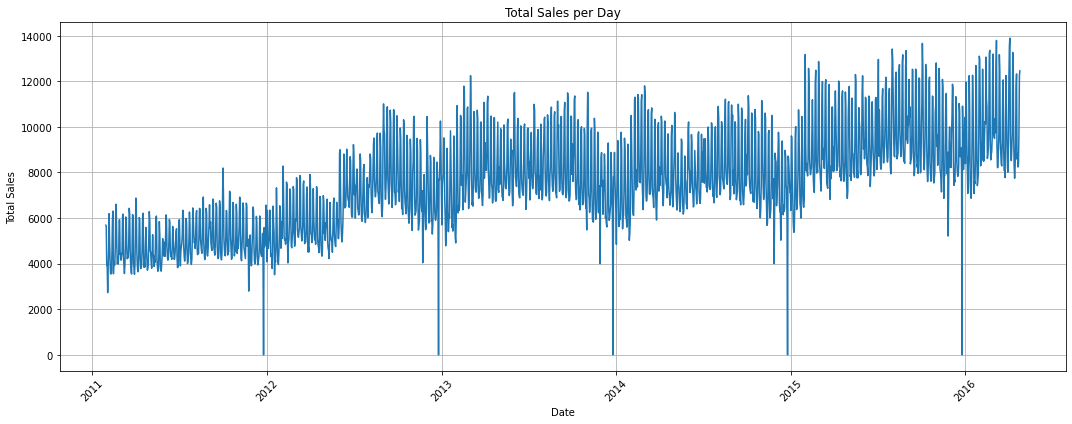

In [ ]:
households['date'] = pd.to_datetime(households['date'])
daily_sales_hh = households.groupby('date')['sold'].sum()
plt.figure(figsize=(15, 6))
plt.plot(daily_sales_hh.index, daily_sales_hh.values)
plt.title('Total Sales per Day')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- Observations:
    - Same as the previous 2 categories, there are dips in sales for every year because of holiday season.
    - There is seasonality in data explained by the periodic patterns.
    - In this graph, we can see there is a slight upward trend and noticeable volatility in daily sales, with some days experiencing significantly higher sales than others.
    - There is also a stable range of demand for household- related items on most days.

Sales distribution of households items by state and store:

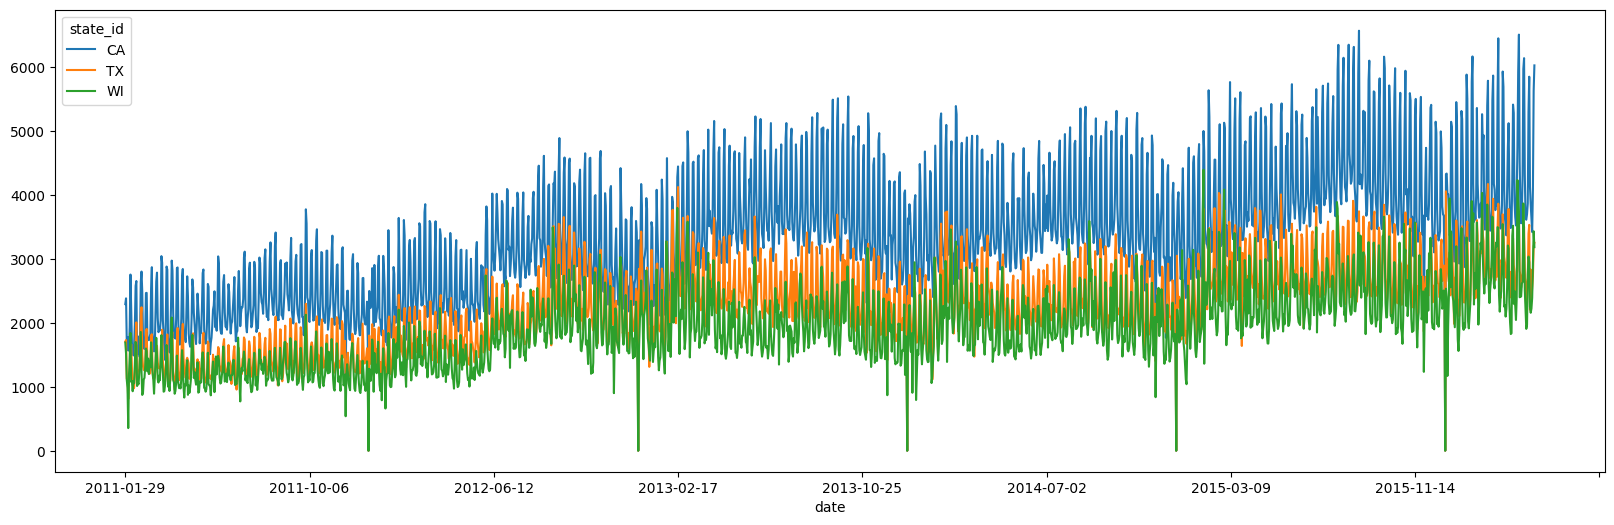

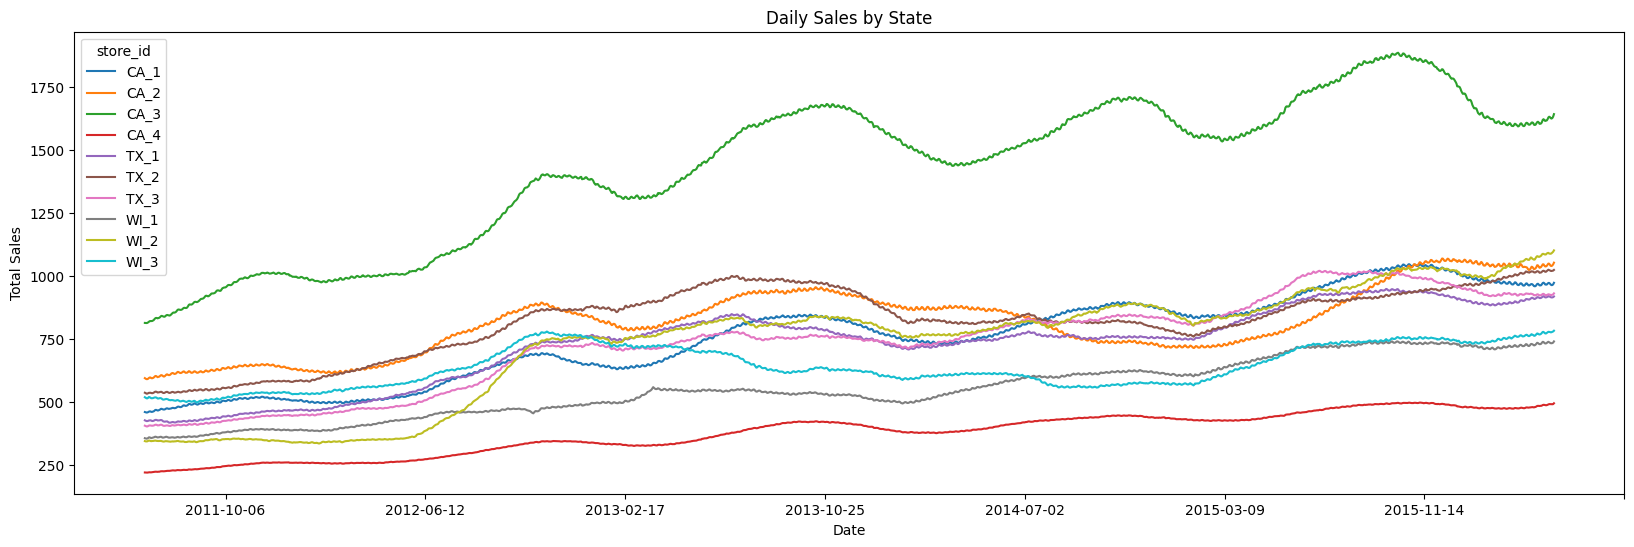

In [ ]:
daily_state_sales_hh = households.groupby(['date','state_id'])['sold'].sum().unstack()
daily_state_sales_hh.plot(kind='line', figsize=(20, 6))

daily_state_sales_hh = households.groupby(['date','store_id'])['sold'].sum().unstack()
window_size = 150 
daily_state_sales_households_smoothed = daily_state_sales_hh.rolling(window=window_size).mean()
daily_state_sales_households_smoothed.plot(kind='line', figsize=(20, 6))

plt.title('Daily Sales by State')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

- Observations:
    -  We can see that stores in California had the most sales of households items in total , stores in Texas contributed slightly more sales than Wisconsin, explained by the higher position of orange line compared to the green line in first graph.
    - In 10 stores, CA_3 significantly outperformed the other stores by about 3 times of sales, however, CA_4 performed the worst in all stores in these 5 years period.

Relationship between sales and event types:

In [ ]:
households_try_1 = households[['date','event_type_1','sold','sell_price']]
households_try_1 = households_try_1.copy()
event_types = ['Sporting', 'Cultural', 'National', 'Religious']
for event_type in event_types:
    households_try_1[event_type] = (households_try_1['event_type_1'] == event_type).astype(int)
households_try_1 = households_try_1.set_index(households_try_1.columns[0])
households_try_1 = households_try_1.dropna(subset=['sell_price'])

In [ ]:
X = households_try_1[['sell_price','Sporting','Cultural','National','Religious']]
X = sm.add_constant(X)
model = sm.OLS(households_try_1['sold'],X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   sold   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                 1.164e+05
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:49:43   Log-Likelihood:            -3.5716e+07
No. Observations:            15989319   AIC:                         7.143e+07
Df Residuals:                15989313   BIC:                         7.143e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6082      0.001   1477.295      0.0

- Observations:
    - Impact of Events: 
        - The negative values of the all the coef indicate that all the attributes have negative impact on quantity sold.
        - Among all the event, national events have the largest impact on sales, showed by the largest value of the coefficient and sporting events have the smallest impact.
    - Statistical significane: The p-value of sporting event is big, meaning the result is not statistically significant, while the other events have small p-values, so they are statistically significant.
    - Sell Price Coefficient: The coef of sell price is -0.1276, meaning for every unit increase in price, the quantity sold drops by 0.1276 unit.
    - R-squared value: The R-squared is 0.035, which means the model only explains 3.5% of the variability, which is not good.

Relationship between sales and SNAP days:

In [ ]:
households_try_2 = households[['date','snap_CA','snap_TX','snap_WI','sold']]
households_try_2 = households_try_2.set_index(households_try_2.columns[0])

In [ ]:
X = households_try_2[['snap_CA','snap_TX','snap_WI']]
X = sm.add_constant(X)
model = sm.OLS(households_try_2['sold'],X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   sold   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     388.9
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          1.30e-252
Time:                        15:07:17   Log-Likelihood:            -4.3150e+07
No. Observations:            20029110   AIC:                         8.630e+07
Df Residuals:                20029106   BIC:                         8.630e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7101      0.001   1143.098      0.0

- Observations:
    - The positive values of the coefficients say that the SNAP days have positive impact on sales of households items, except the SNAP_WI which has negative value, but its p-value is small, so the impact is not statistically significant.
    - The R-squared of the model is 0.000, which means the model explains none of the variability in the data.

### Trends in Daily/Weekly/Monthly Sales Across Categories and States:

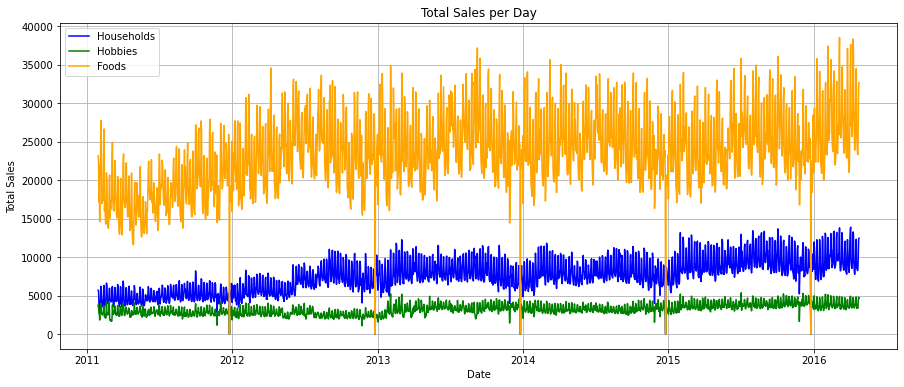

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(daily_sales_hh.index, daily_sales_hh.values,color='blue', label='Households')
plt.plot(daily_sales_hb.index, daily_sales_hb.values,color='green', label='Hobbies')
plt.plot(daily_sales_food.index, daily_sales_food.values,color='orange', label='Foods')
plt.title('Total Sales per Day')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend() 
plt.show()

- Observations:
    - We can see that for all 3 categories, the foods items have significantly higher sales than the other categories. The hobbies category has the least sales.
    - All categories shows a stable demand in these 5 years.
    -  There are no obvious upward or downward trend in the data.

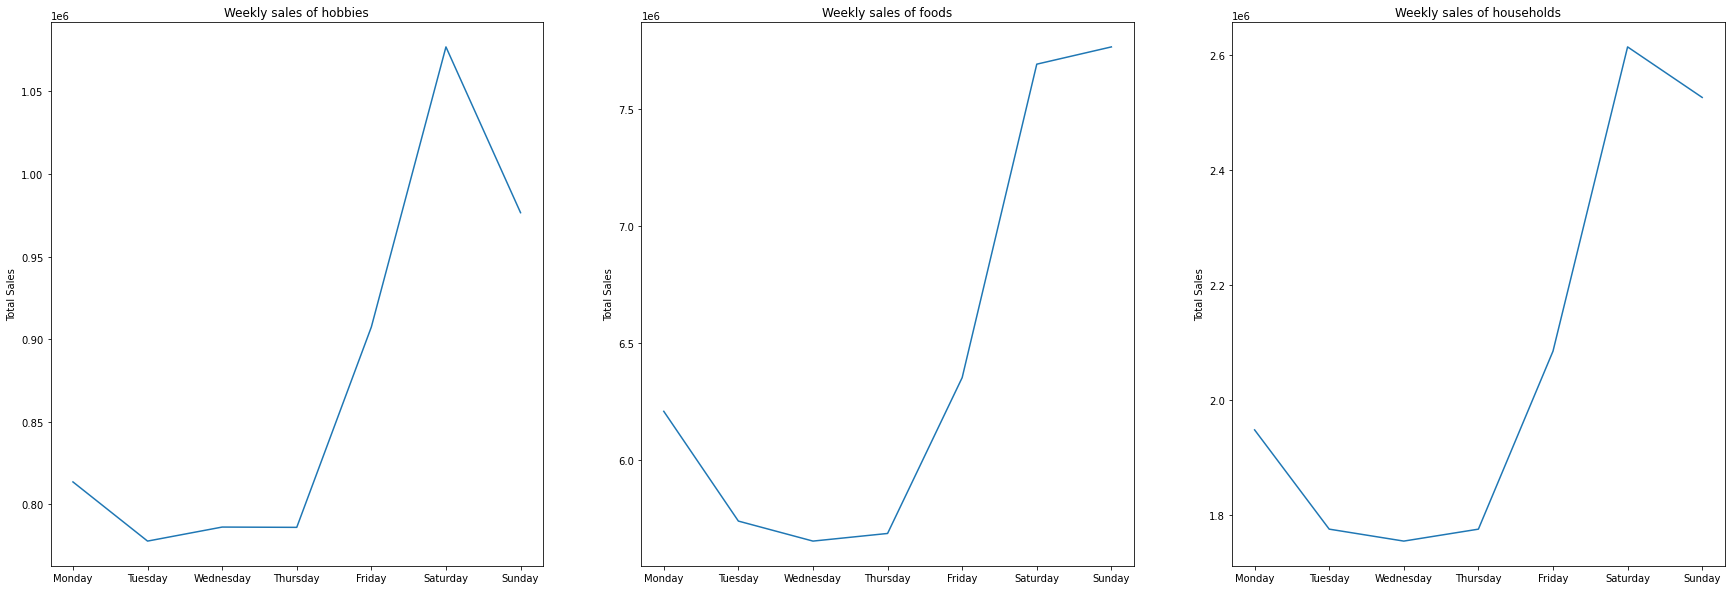

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']  
weekly_sales = (hobbies.groupby('weekday')['sold'].sum().reset_index().assign(weekday=lambda x: pd.Categorical(x['weekday'], categories = day_order, ordered=True)).sort_values('weekday'))
weekly_sales_foods = (foods.groupby('weekday')['sold'].sum().reset_index().assign(weekday=lambda x: pd.Categorical(x['weekday'], categories = day_order, ordered=True)).sort_values('weekday'))
weekly_sales_hh = (households.groupby('weekday')['sold'].sum().reset_index().assign(weekday=lambda x: pd.Categorical(x['weekday'], categories = day_order, ordered=True)).sort_values('weekday'))

fig, axs = plt.subplots(1, 3, figsize=(30, 10), sharex=True)

# Plot weekly sales for hobbies
axs[0].plot(weekly_sales['weekday'], weekly_sales['sold'])
axs[0].set_title('Weekly sales of hobbies')
axs[0].set_ylabel('Total Sales')

# Plot weekly sales for foods
axs[1].plot(weekly_sales_foods['weekday'], weekly_sales_foods['sold'])
axs[1].set_title('Weekly sales of foods')
axs[1].set_ylabel('Total Sales')

# Plot weekly sales for households
axs[2].plot(weekly_sales_hh['weekday'], weekly_sales_hh['sold'])
axs[2].set_title('Weekly sales of households')
axs[2].set_ylabel('Total Sales')

plt.show()

- Observations:
    - For all categories, the quantity solds rise from Thursday and peak on Saturday.
    - For hobbies and households item, the quantity sold drops after the peak, however, for food, the quantity sold continue to increase on Sunday.
    - After the weekends, the quantity sold of all items plummeted and reach the lowest points on Tuesdays or Wednesday.

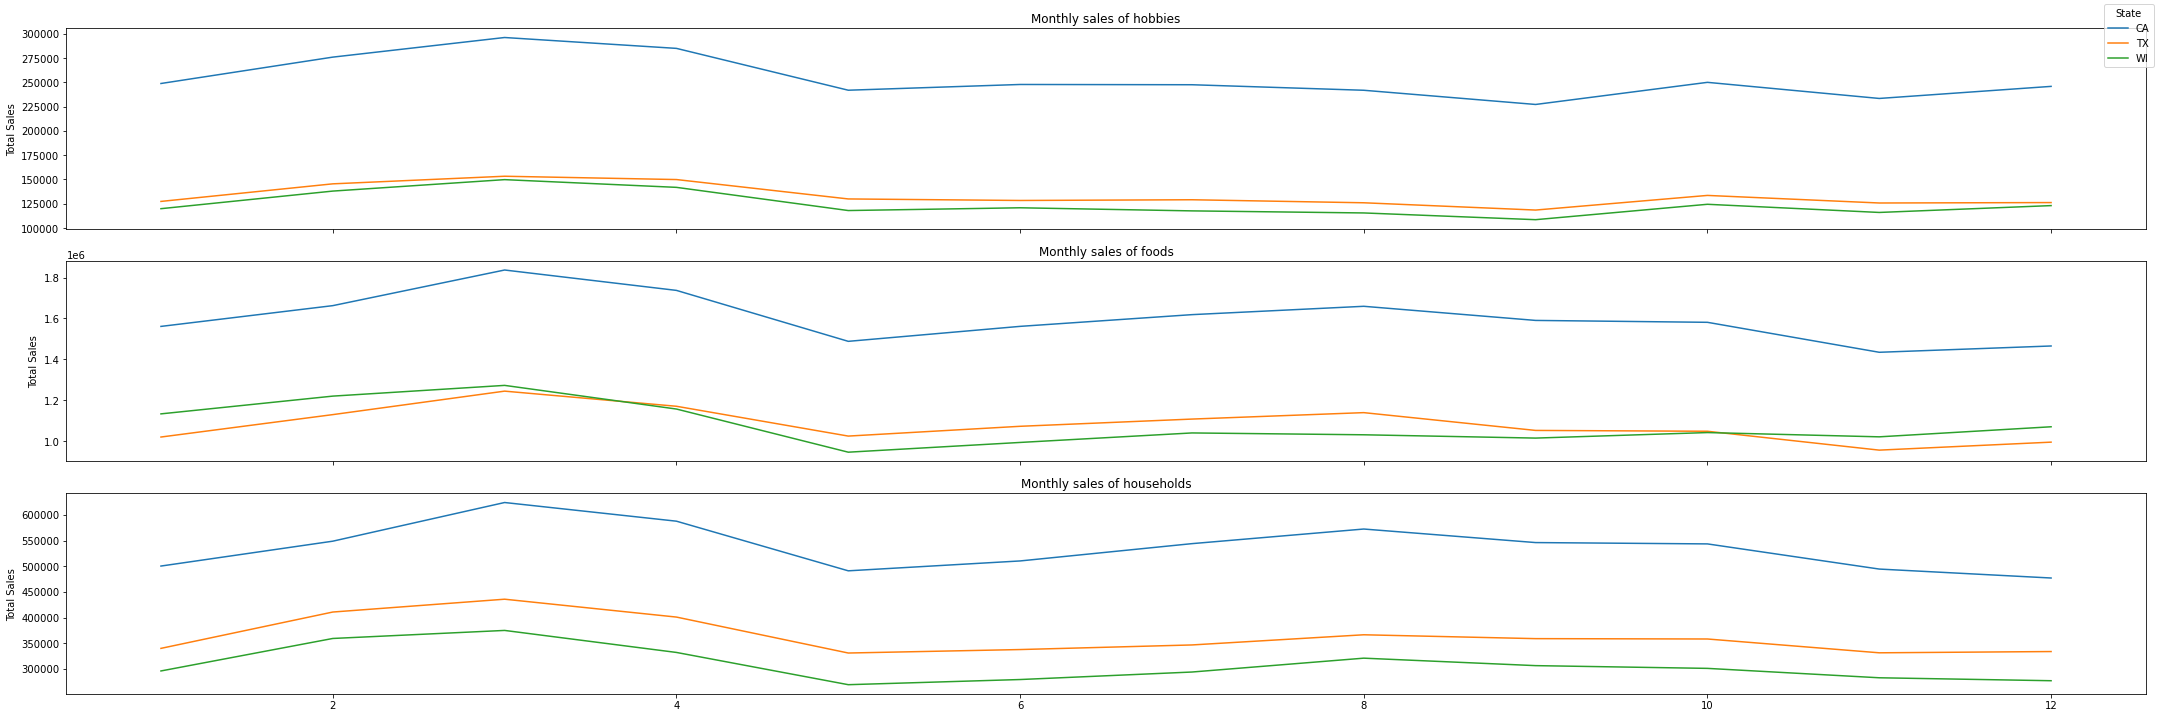

In [ ]:
monthly_sales_hb = hobbies.groupby(['month','state_id'])['sold'].sum().unstack()
monthly_sales_foods = foods.groupby(['month','state_id'])['sold'].sum().unstack()
monthly_sales_hh = households.groupby(['month','state_id'])['sold'].sum().unstack()

fig, axs = plt.subplots(3,1, figsize=(30, 10), sharex=True)

# Plot weekly sales for hobbies
axs[0].plot(monthly_sales_hb.index, monthly_sales_hb.values)
axs[0].set_title('Monthly sales of hobbies')
axs[0].set_ylabel('Total Sales')

# Plot weekly sales for foods
axs[1].plot(monthly_sales_foods.index, monthly_sales_foods.values)
axs[1].set_title('Monthly sales of foods')
axs[1].set_ylabel('Total Sales')

# Plot weekly sales for households
axs[2].plot(monthly_sales_hh.index, monthly_sales_hh.values)
axs[2].set_title('Monthly sales of households')
axs[2].set_ylabel('Total Sales')

fig.legend(monthly_sales_hb.columns, loc='upper right', title='State')
plt.tight_layout()

plt.show()

### Hypothesis testing

1. Test whether there is a difference in sales of foods/hobbies/households items on event day and non-event day 
- H0 : The average sales volume of foods/hobbies/households on event days is equal to the average sales volume on non-event days.
- H1 : The average sales volume of foods/hobbies/households on event days is not equal to the average sales volume on non-event days.

In [14]:
foods.drop('Unnamed: 0',axis=1, inplace = True)
hobbies.drop('Unnamed: 0',axis=1, inplace = True)
households.drop('Unnamed: 0',axis=1, inplace = True)

# Create a new column 'is_event' that is 1 if 'event_day' is not NaN, and 0 otherwise
foods['is_event'] = foods[['event_name_1', 'event_name_2']].notna().any(axis=1).astype(int)
hobbies['is_event'] = hobbies[['event_name_1', 'event_name_2']].notna().any(axis=1).astype(int)
households['is_event'] = households[['event_name_1', 'event_name_2']].notna().any(axis=1).astype(int)

# Filter the data into two groups
event_sales_foods = foods[foods['is_event'] == 1]['sold']
non_event_sales_foods = foods[foods['is_event'] == 0]['sold']
event_sales_hobbies = hobbies[hobbies['is_event'] == 1]['sold']
non_event_sales_hobbies = hobbies[hobbies['is_event'] == 0]['sold']
event_sales_households = households[households['is_event'] == 1]['sold']
non_event_sales_households = households[households['is_event'] == 0]['sold']

In [15]:
# Foods
t_stat, p_value = stats.ttest_ind(event_sales_foods.dropna(), non_event_sales_foods.dropna(), equal_var=False)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -17.823210032624683, P-value: 4.713533263029638e-71


In [ ]:
# Perform the t-test for hobbies items
t_stat, p_value = stats.ttest_ind(event_sales_hobbies.dropna(), non_event_sales_hobbies.dropna(), equal_var=False)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -25.675415576642916, P-value: 2.439593290599033e-145


In [ ]:
# Perform the t-test
t_stat, p_value = stats.ttest_ind(event_sales_households.dropna(), non_event_sales_households.dropna(), equal_var=False)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -33.37833274910324, P-value: 3.327601010398372e-244


- Result:
    - As the t-statistic is large in all 3 groups, meaning there is a big difference in average sales volume between 2 groups.
    - The negative sign indicates the mean value of the first group is lower than the second group, which means the mean value of sales during event day is lower than the mean value of sales during the non-event day.
    - The t-statistic is the largest for household items, so the difference in average sales between 2 group is the largest among 3 categories.
    - The extremly small p-value shows strong evidence to reject the null hypothesis, that is, there is no difference on average sales between event and non-event days, the result is statistically significant and not by random chance

2. Test whether there is a difference in sales of foods/hobbies/households items on snap day and non-snap day 
- H0 : The average sales volume of foods/hobbies/households on snap days is equal to the average sales volume on non-snap days.
- H1 : The average sales volume of foods/hobbies/households on snap days is not equal to the average sales volume on non-snap days.

In [ ]:
foods['snap_day'] = (foods['snap_CA'] | foods['snap_TX'] | foods['snap_WI']).astype(int)
households['snap_day'] = (households['snap_CA'] | households['snap_TX'] | households['snap_WI']).astype(int)
hobbies['snap_day'] = (hobbies['snap_CA'] | hobbies['snap_TX'] | hobbies['snap_WI']).astype(int)

In [ ]:
snap_sale_foods = foods[foods['snap_day'] == 1]['sold']
non_snap_sales_foods =foods[foods['snap_day'] == 0]['sold']
snap_sale_households = households[households['snap_day'] == 1]['sold']
non_snap_sales_households=households[households['snap_day'] == 0]['sold']
snap_sale_hobbies = hobbies[hobbies['snap_day'] == 1]['sold']
non_snap_sales_hobbies = hobbies[hobbies['snap_day'] == 0]['sold']

In [ ]:
t_stat, p_value = stats.ttest_ind(snap_sale_foods.dropna(), non_snap_sales_foods.dropna(), equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 115.75646569560226, P-value: 0.0


In [ ]:
t_stat, p_value = stats.ttest_ind(snap_sale_hobbies.dropna(), non_snap_sales_hobbies.dropna(), equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 10.149699038388919, P-value: 3.324702019947821e-24


In [ ]:
t_stat, p_value = stats.ttest_ind(snap_sale_households.dropna(), non_snap_sales_households.dropna(), equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 28.27352093605877, P-value: 7.374711213666532e-176


- Results:
    - The t-statistic value are all positive, indicates the the average sales volume in first group is larger than second group, meaning the average sales volume of all items during SNAP days is larger than the average sales volume of all items during non-SNAP day.
    - Among all categories, the difference is the most significant in the food category as the value is significant larger than the other 2 categories while the difference is the least significant in the hobbies category.
    - The small p-value shows strong evidence to reject the null hypothesis, that is, it is very unlikely that the observed differences in sales between SNAP and non-SNAP days are due to random chance and the result is statistically significant.